In [2]:
import polars as pl
import pandas as pd

In [3]:
data_df = pd.read_parquet("data/data.parquet")
ukazatel = data_df.loc[data_df["kodukaz"] == 10000]
rocniky = ukazatel["rok"].unique()
print(min(list(rocniky)))

2000


## datové matice ukazatelů v letech

In [4]:
df = pl.read_parquet("data/data.parquet")
ukazatele = pl.read_csv("data/cis_ukazatelu.csv")
uzemi = pl.read_csv("data/cis_uzemi.csv")
df.head()

rok,kodukaz,koduzemi,hodnota
i32,i32,i32,f32
2021,10000,500011,0.0
2021,10000,500020,0.0
2021,10000,500046,0.0
2021,10000,500062,0.0
2021,10000,500071,0.0


In [5]:
uzemi_enum = df["koduzemi"].unique()
matrix_alluzemi = df.pivot(values="hodnota", index=("rok", "koduzemi"), columns="kodukaz", aggregate_function=None).lazy()
matrices = {}
matrixes_uzemi = pl.collect_all([matrix_alluzemi.filter(pl.col("koduzemi") == uzemi) for uzemi in uzemi_enum])
len(matrixes_uzemi)

6272

In [6]:
matrixes_uzemi[0]

rok,koduzemi,10000,10300,10350,10360,10370,10380,10390,10391,40300,40310,40320,40331,40400,40410,40420,40500,40510,40520,40540,40550,40560,40570,40580,40590,40731,40733,40735,40737,40741,40743,40745,40747,40751,40753,40755,…,402505,402602,402604,402605,402606,110960,140800,250100,250110,250120,250130,250140,250150,250160,250170,250180,250190,250200,250210,250220,250230,250240,250250,250260,250270,250280,250290,250300,250310,250320,250330,250340,250350,250360,250370,250380,250390
i32,i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
2021,500011,0.0,1602.589355,1.0,1.0,1.0,0.0,0.0,2.0,1.0,103.0,4.0,7.6,1.0,20.0,1.0,1.0,358.0,18.0,0.0,0.0,0.0,10.7,13.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2022,500011,0.0,1602.589355,1.0,1.0,1.0,0.0,0.0,2.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2020,500011,0.0,1602.589233,1.0,1.0,1.0,0.0,0.0,2.0,1.0,102.0,4.0,7.6,0.0,0.0,0.0,1.0,325.0,18.0,0.0,0.0,0.0,11.9,13.5,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2019,500011,0.0,1602.589233,1.0,1.0,1.0,0.0,0.0,2.0,1.0,79.0,3.0,5.8,0.0,0.0,0.0,1.0,337.0,17.0,0.0,0.0,0.0,9.4,14.2,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2018,500011,0.0,1602.589233,1.0,1.0,1.0,0.0,0.0,2.0,1.0,81.0,3.0,6.0,0.0,0.0,0.0,1.0,321.0,17.0,0.0,0.0,0.0,9.7,13.6,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2017,500011,0.0,1602.588867,1.0,1.0,1.0,0.0,0.0,2.0,1.0,84.0,3.0,6.0,0.0,0.0,0.0,1.0,301.0,16.0,0.0,0.0,0.0,10.7,11.3,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2016,500011,0.0,1602.588867,1.0,1.0,1.0,0.0,0.0,2.0,1.0,84.0,3.0,6.0,0.0,0.0,0.0,1.0,285.0,15.0,0.0,0.0,0.0,9.0,9.5,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2015,500011,0.0,1602.576416,1.0,1.0,1.0,0.0,0.0,2.0,1.0,84.0,3.0,6.0,0.0,0.0,0.0,1.0,272.0,14.0,0.0,0.0,0.0,8.8,9.3,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2014,500011,0.0,1602.576416,1.0,1.0,1.0,0.0,0.0,2.0,1.0,84.0,3.0,6.0,0.0,0.0,0.0,1.0,259.0,12.0,0.0,0.0,0.0,8.0,7.8,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [7]:
matrixes_uzemi = {m.lazy().select(pl.col("koduzemi")).head(1).collect()[0, 0]: m.drop("koduzemi") for m in matrixes_uzemi}
matrixes_uzemi.keys()

dict_keys([500011, 500020, 500046, 500062, 500071, 500101, 500127, 500135, 500151, 500160, 500194, 500259, 500291, 500496, 500526, 500623, 500801, 500852, 500861, 500879, 501476, 501646, 501751, 501794, 501841, 502146, 502235, 502405, 502545, 502839, 503142, 503304, 503410, 503444, 503622, 503657, 503738, 503916, 503941, 504246, 504301, 504441, 504505, 504785, 504807, 504921, 504955, 505005, 505013, 505030, 505081, 505099, 505111, 505145, 505161, 505188, 505218, 505269, 505293, 505366, 505391, 505501, 505528, 505587, 505609, 505650, 505668, 505781, 505862, 505927, 506192, 506214, 506320, 506451, 506460, 506486, 506494, 506621, 506664, 506699, 506702, 506711, 506729, 506737, 506753, 506761, 506770, 507016, 507091, 507105, 507113, 507181, 507237, 507261, 507270, 507334, 507377, 507423, 507458, 507504, 507547, 507580, 507610, 507628, 507644, 507652, 507695, 507717, 507733, 507784, 507920, 507971, 508004, 508128, 508144, 508152, 508357, 508373, 508501, 508683, 509078, 509108, 509116, 50914

In [24]:
import plotly.express as px
# import plotly.graph_objects as go

uzemiId = 500011
matrix = matrixes_uzemi[uzemiId].sort("rok").to_pandas()
uzemi_nazev = uzemi.filter(pl.col("koduzemi") == uzemiId).get_column("obec")[0]
ukazatel = 10300
ukazatel_nazev = ukazatele.filter(pl.col("kodukaz") == ukazatel).select("nazev").to_pandas()["nazev"][0]
px.line(matrix, x="rok", y=str(ukazatel), title=f"{uzemi_nazev}: {ukazatel_nazev}")

## Fit data with polynomial

In [9]:

import numpy as np

x = matrix["rok"]
y = matrix[str(ukazatel)]
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], list(x)[-1], len(x))
y_new = f(x_new)


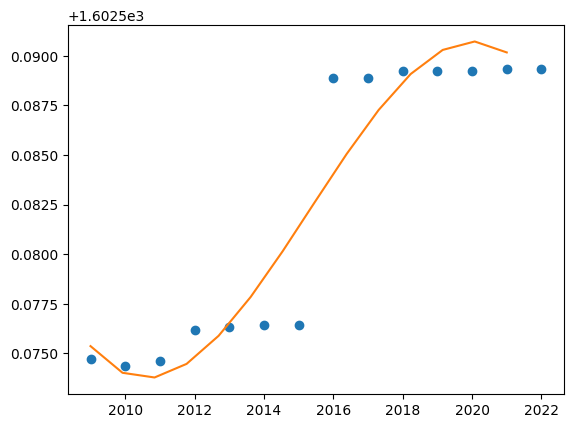

In [10]:

import matplotlib.pyplot as plt
plt.plot(x,y,'o', x_new, y_new)
# plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

## forward fill data

In [19]:
# sample data
topic = pl.from_pandas(matrix[["rok", str(ukazatel)]])
topic = topic.lazy().with_columns(pl.col("rok").cast(pl.Utf8).alias("tmp").str.strptime(pl.Date, "%Y")).sort("tmp").collect().upsample(time_column="tmp", every="1y").lazy().interpolate().fill_null(strategy="forward").drop("tmp").collect()
topic

rok,10300
f64,f32
2009.0,1602.574707
2010.0,1602.574341
2011.0,1602.574585
2012.0,1602.576172
2013.0,1602.576294
2014.0,1602.576416
2015.0,1602.576416
2016.0,1602.588867
2017.0,1602.588867


In [38]:
# actual data
topic = pl.read_csv("data/parlament_data.csv")
# topic.lazy().group_by("OBEC", "ROK", "KSTRANA").agg(pl.col("POC_HLASU").sum()).collect()
topic = topic.pivot(values="POC_HLASU", index=("OBEC", "ROK"), columns="KSTRANA", aggregate_function="sum")

In [40]:
citywise = {}
for obec in topic["OBEC"].unique():
    citywise[obec] = topic.lazy().filter(pl.col("OBEC") == obec).drop("OBEC", "NAZEVCELK").collect()

In [45]:
topic = citywise[500011]
topic = topic.lazy().with_columns(pl.col("ROK").cast(pl.Utf8).alias("tmp").str.strptime(pl.Date, "%Y")).sort("tmp").collect().upsample(time_column="tmp", every="1y").lazy().interpolate().fill_null(strategy="forward").drop("tmp").collect()
topic

ROK,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,17,30,31
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2010.0,2.0,null,null,117.0,1.0,66.0,null,null,195.0,null,null,7.0,93.0,null,267.0,null,4.0,null,12.0,27.0,null,8.0,4.0,11.0,234.0,null,null,null,88.0,null,null
2011.0,56.0,null,null,145.333333,2.0,59.333333,null,null,132.333333,null,null,8.285714,62.666667,null,189.333333,null,4.0,null,79.0,42.333333,null,8.666667,4.333333,11.0,201.571429,null,null,null,94.666667,null,null
2012.0,110.0,null,null,173.666667,3.0,52.666667,null,null,69.666667,null,null,9.571429,32.333333,null,111.666667,null,4.0,null,146.0,57.666667,null,9.333333,4.666667,11.0,169.142857,null,null,null,101.333333,null,null
2013.0,164.0,24.0,27.0,202.0,4.0,46.0,null,null,7.0,1.0,123.0,10.857143,2.0,null,34.0,null,4.0,null,213.0,73.0,null,10.0,5.0,11.0,136.714286,null,null,null,108.0,null,null
2014.0,151.25,21.5,20.5,172.5,12.0,35.0,null,null,7.25,2.25,123.0,12.142857,1.75,null,50.0,null,6.5,null,169.25,120.75,null,8.0,31.25,11.0,104.285714,null,null,null,111.75,null,null
2015.0,138.5,19.0,14.0,143.0,20.0,24.0,null,null,7.5,3.5,123.0,13.428571,1.5,null,66.0,null,9.0,null,125.5,168.5,null,6.0,57.5,11.0,71.857143,null,null,null,115.5,null,null
2016.0,125.75,16.5,7.5,113.5,28.0,13.0,null,null,7.75,4.75,123.0,14.714286,1.25,null,82.0,null,11.5,null,81.75,216.25,null,4.0,83.75,11.0,39.428571,null,null,null,119.25,null,null
2017.0,113.0,14.0,1.0,84.0,36.0,2.0,88.0,40.0,8.0,6.0,123.0,16.0,1.0,1.0,98.0,null,14.0,1.0,38.0,264.0,null,2.0,110.0,11.0,7.0,null,null,144.0,123.0,8.0,null
2018.0,86.25,11.5,5.75,91.75,44.0,2.0,66.5,36.75,6.75,5.0,123.0,22.25,86.25,1.0,74.25,null,16.5,1.0,94.25,199.5,null,2.0,110.0,11.0,7.0,null,null,144.0,126.75,8.0,null


## Predict data

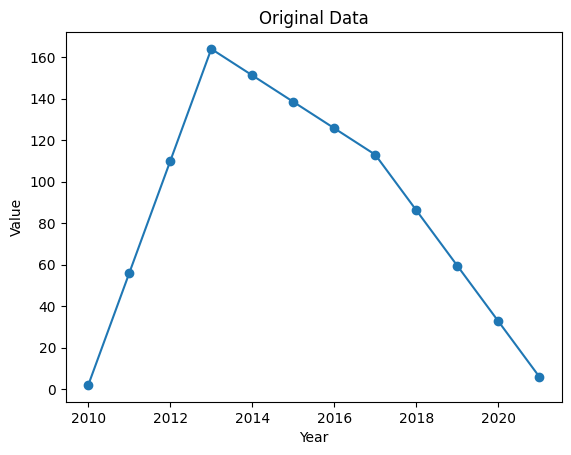

/home/nexovec/miniconda3/envs/HackujStatV5/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



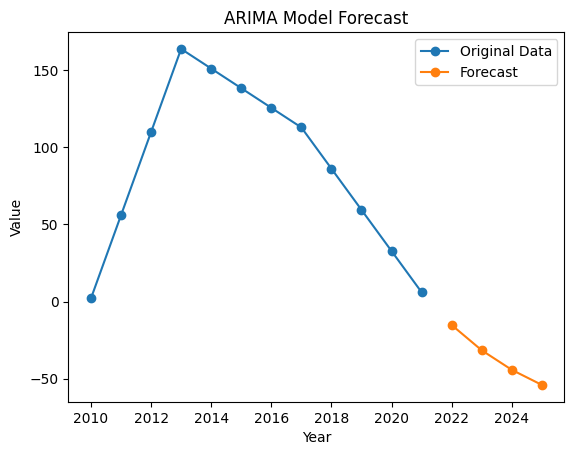

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -49.477
Date:                Fri, 19 Jan 2024   AIC                            104.953
Time:                        23:30:55   BIC                            106.147
Sample:                             0   HQIC                           104.201
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7720      0.825      0.936      0.349      -0.844       2.388
ma.L1          0.1138      2.493      0.046      0.964      -4.773       5.001
sigma2       427.9333    305.787      1.399      0.1

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = topic.to_pandas()

# Plot the original data
plt.plot(df['ROK'], df['1'], marker='o', linestyle='-')
plt.title('Original Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # (p, d, q) order of the ARIMA model
model = ARIMA(df['1'], order=order)
result = model.fit()

# Forecast future values
future_years = [2022, 2023, 2024, 2025]
forecast = result.predict(start=len(df), end=len(df) + len(future_years) - 1, typ='levels')

# Plot the original data and the forecast
plt.plot(df['ROK'], df['1'], marker='o', linestyle='-', label='Original Data')
plt.plot(future_years, forecast, marker='o', linestyle='-', label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display the ARIMA model summary
print(result.summary())